In [1]:

#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#image input

def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

filename = "sid.png"
img = read_file(filename)

org_img = np.copy(img)
#image resizing
img_re = cv2.resize(img, None, fx=0.5, fy=0.5)

In [3]:

#removing impurities from image
for i in range(3):
	img_clr = cv2.medianBlur(img_re, 3)

img_clr = cv2.edgePreservingFilter(img_clr, sigma_s=5)



#image filtering 
img_fltr = cv2.bilateralFilter(img_clr, 3, 10, 5)

for i in range(2):
	img_fltr = cv2.bilateralFilter(img_fltr, 3, 20, 10)

for i in range(3):
	img_fltr = cv2.bilateralFilter(img_fltr, 5, 20, 5)


#image sharpening
gaussian_mask= cv2.GaussianBlur(img_fltr, (7,7), 2)
img_shrp = cv2.addWeighted(img_fltr, 1.5, gaussian_mask, -0.5, 0)
img_shrp = cv2.addWeighted(img_fltr, 1.4, gaussian_mask, -0.2, 10)


In [4]:
#edge outlining

def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_value)
    return edges
    

In [5]:
line_size, blur_value = 9,5
edges = edge_mask(img, line_size, blur_value)


In [6]:
def color_quantization(img, k):
    
    data = np.float32(img).reshape((-1,3))
    
    criteria = (cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

In [7]:
img = color_quantization(img, k=7)

In [8]:
blurred = cv2.GaussianBlur(img,(7,7),0)


In [9]:
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

limg = cv2.merge((cl,a,b))

enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)


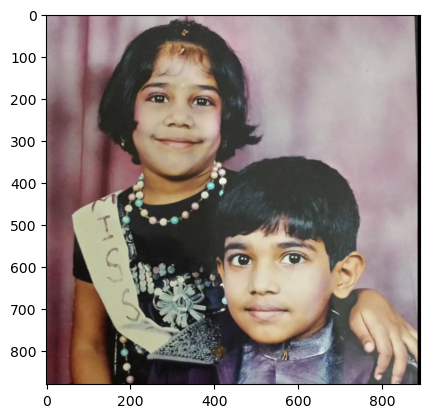

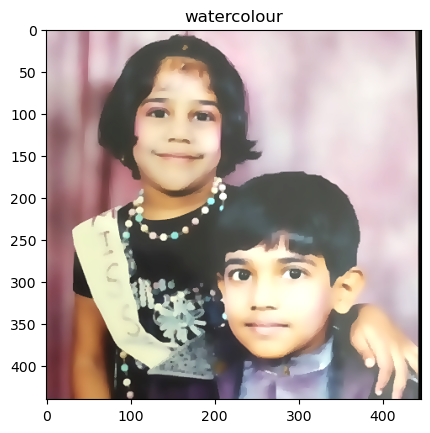

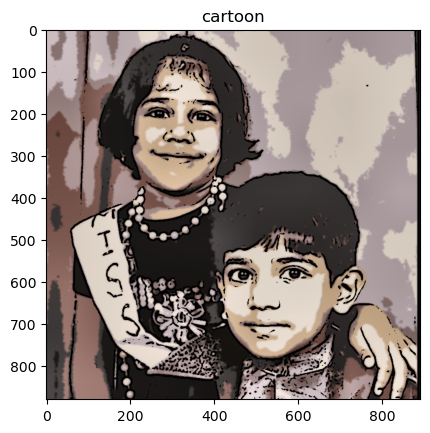

In [10]:
def cartoon():
    c = cv2.bitwise_and(enhanced_img, enhanced_img, mask = edges)
    plt.imshow(org_img)
    plt.show()

    plt.imshow(img_shrp)
    plt.title("watercolour")
    plt.show()
    
    plt.imshow(c)
    plt.title("cartoon")
    plt.show()
    
cartoon()

In [11]:
# def contrast(tmp):
#     lab = cv2.cvtColor(tmp, cv2.COLOR_BGR2LAB)
#     l_channel, a, b = cv2.split(lab)

#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     cl = clahe.apply(l_channel)

#     limg = cv2.merge((cl,a,b))

#     enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

#     result = np.hstack((org_img, enhanced_img))
    
#     return result

